#### **Installing libraries and extracting Dataset**

In [19]:
import csv
import math
import time
import warnings
import operator
import statistics
import seaborn as sns
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import datetime
from scipy import stats
from IPython.display import display_html
from multiprocessing import Pool

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [20]:
# Markdown Display
def printmd(string):
    display(Markdown(string))

In [21]:
#Loading in the combine outages dataset
df_ipl_ads = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_DATASET_storm_V10.3.csv')
df_ipl_ads['CREATION_DATETIME'] = pd.to_datetime(df_ipl_ads['CREATION_DATETIME'], infer_datetime_format = True, errors = 'coerce')
df_ipl_ads.head()

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,LAT,LONG,ZONE,NO_OF_POWER_OUT_CLUE_PER_DAY,NO_OF_OPEN_DEVICE_CLUE_PER_DAY,NO_OF_IVR_CLUE_PER_DAY,NO_OF_ANIMAL_CAUSE_PER_DAY,NO_OF_WIRE_OCCURN_PER_DAY,Marker_Location,Hour_Sin,Hour_Cos,RANK_SUBSEQUENT_OUTAGES,LIVE_OUTAGE,Outages_in_last_1hr,Outages_in_last_2hr,Outages_in_last_3hr,Outages_in_last_4hr,Outages_in_last_5hr,Outages_in_last_6hr,Outages_in_last_7hr,Outages_in_last_8hr,Outages_in_last_9hr,Outages_in_last_10hr,Weekday,Weekend_flag,Live_outage_group,Priority_Customer_Qty,Dis_From_Live_Centriod_div_Cust_qty,Priority_Dist_Customer_Qty,Dispatch_Location,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,mslPresAvg,mslPresMax,mslPresMin,precip,radSolarAvg,radSolarMax,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,Active_no_of_trucks_per_day
0,2001309371,2000383861.00,3059,BLUE SKY,2007-01-01 03:33:00,2007-01-01 03:48:00,3059.00,SSUB,305.00,4,177.00,1.00,2007-01-01 05:03:00,177.00,False,15.00,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,INDIANAPOLIS,39.88,-86.11,ZONE3,7,1,5,2,1,Marker4,0.71,0.71,1.00,0,0,0,0,0,0,0,0,0,0,0,Monday,False,1,1.00,0.00,1.00,ARL.,92.00,100.00,44.00,33.90,39.50,30.00,30.30,36.70,24.30,38.50,43.70,34.50,1016.40,1026.00,1008.90,0.00,28.50,125.40,684.30,83.30,90.30,79.30,986.80,995.80,980.10,0.00,4.20,5.20,3.60,38.50,43.70,34.50,36.60,41.70,32.80,30.30,36.70,24.30,269.00,269.00,267.00,16.80,20.30,8.80,17.00,20.60,8.90,14.40,17.80,6.70,9.20,11.10,15.70,56.00,11.00,1.14,1.02,nan
1,2001309379,2000383864.00,494-B/403,BLUE SKY,2007-01-01 08:16:14,2007-01-01 10:04:24,1252.00,FUSE,125.00,1,5.00,0.00,2007-01-01 11:46:14,5.00,True,108.17,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,INDIANAPOLIS,39.78,-86.27,ZONE4,7,1,5,2,1,Marker10,0.87,-0.50,2.00,0,0,0,0,0,1,1,1,1,1,1,Monday,False,2,2.00,1.05,2.00,MILL,93.00,100.00,43.00,33.20,39.10,29.50,29.60,36.30,23.50,37.90,43.20,34.00,1016.90,1026.20,1009

In [22]:
df_ipl_ads = df_ipl_ads[(df_ipl_ads.EVENT == 'BLUE SKY') | (df_ipl_ads.EVENT == 'STORM')] 
print(df_ipl_ads.EVENT.value_counts())
print(df_ipl_ads.shape)

BLUE SKY    64407
STORM       19633
Name: EVENT, dtype: int64
(84040, 156)


In [23]:
df_ipl_ads['Month'] = df_ipl_ads['CREATION_DATETIME'].dt.month
df_ipl_ads['Year'] = df_ipl_ads['CREATION_DATETIME'].dt.year

df_ipl_ads['Period'] = df_ipl_ads.Year.astype(str) + "-" + df_ipl_ads.Month.astype(str)

df_outages = df_ipl_ads.groupby(['Period'],as_index=False).agg({'OUTAGE_ID' : 'count'})
df_outages.rename({'OUTAGE_ID' : 'No_of_outages'}, axis=1, inplace=True)
df_outages_v1 = df_outages[df_outages.No_of_outages>1200]

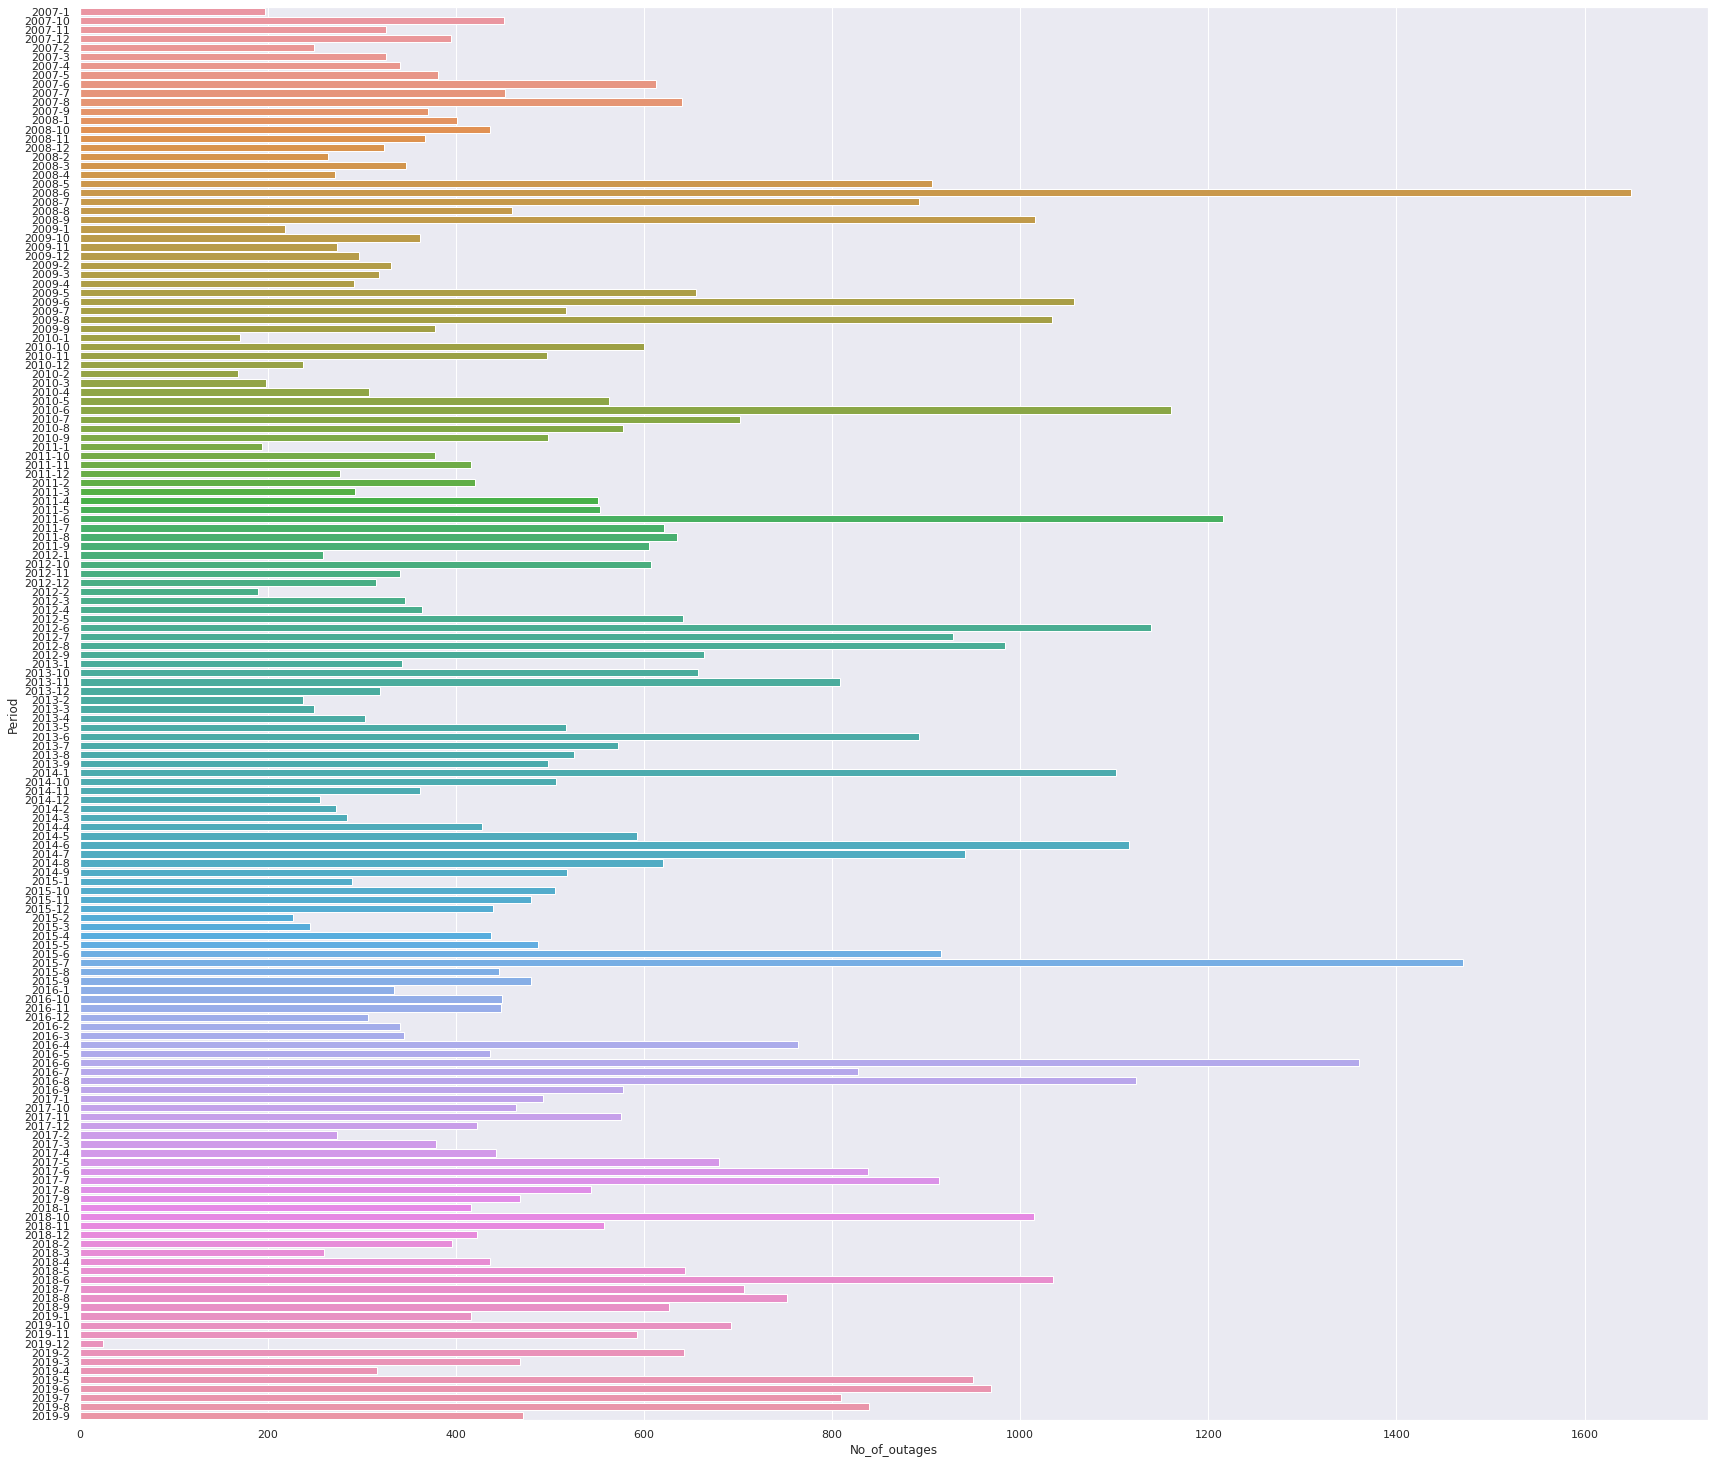

In [24]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(26,26)})
ax = sns.barplot(x="No_of_outages", y="Period", data=df_outages)

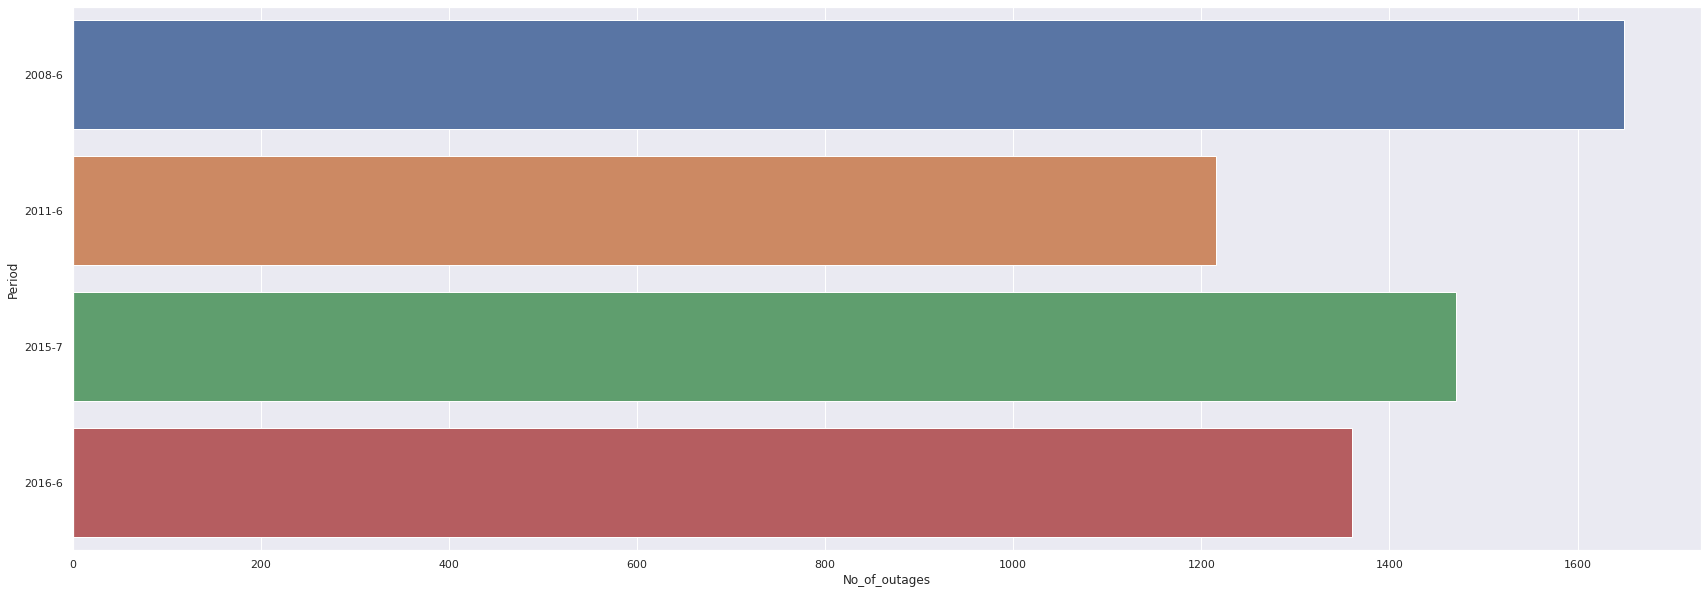

In [25]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(26,10)})
ax = sns.barplot(x="No_of_outages", y="Period", data=df_outages_v1)

**2008 - 06**
- The tornado outbreak sequence of May 22–31, 2008 was a series of tornado outbreaks affecting the central plains of the United States from May 22 to May 31 of 2008. <br>
- It was also one of the largest continuous tornado outbreaks on record. <br>
Link - https://www.weather.gov/ind/may302008_tor <br>

**2011 - 06**
-The tornado outbreak sequence of April 19–24, 2011 was an extended period of significant tornado activity that began on April 19th, 2011 and ended on April 24, 2011. 
Link - https://en.wikipedia.org/wiki/Tornado_outbreak_sequence_of_April_19%E2%80%9324,_2011

**2015 - 07**
- Waves of showers and thunderstorms moved across central Indiana on July 13 and into the early morning of July 14. <br>
- Upper level features interacted with a surface front and plenty of moisture and instability to generate severe weather and heavy rains/flooding. <br>
- Two tornadoes occurred during the evening of the 13th. One tornado was in Warren County, and the other was in Putnam County. <br>
- Widespread tree and power line damage occurred across central Indiana, and some locations received over 4 inches of rain. <br>
- A few locations had hail as well. <br>
- The heavy rain led to flooding in many areas. <br>
Link - https://www.weather.gov/ind/july13142015severe <br>

**2016 - 06**
- An upper level system worked with a hot and unstable atmosphere to produce strong to severe thunderstorms across central Indiana during the afternoon and early evening of June 15. <br>
- Damaging winds and heavy rain/flooding were the main impacts. <br>
Link - https://www.weather.gov/ind/june152016severe <br>

### **Outlier Detection**
In statistics, an outlier is an observation point that is distant from other observations.

### **Discovering outliers with visualization tools**
- In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. <br>
- Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. <br>
- Outliers may be plotted as individual points. <br>

#### 2007 to 2019 Storm + Bluesky data

Mean TTR 258.28


[]

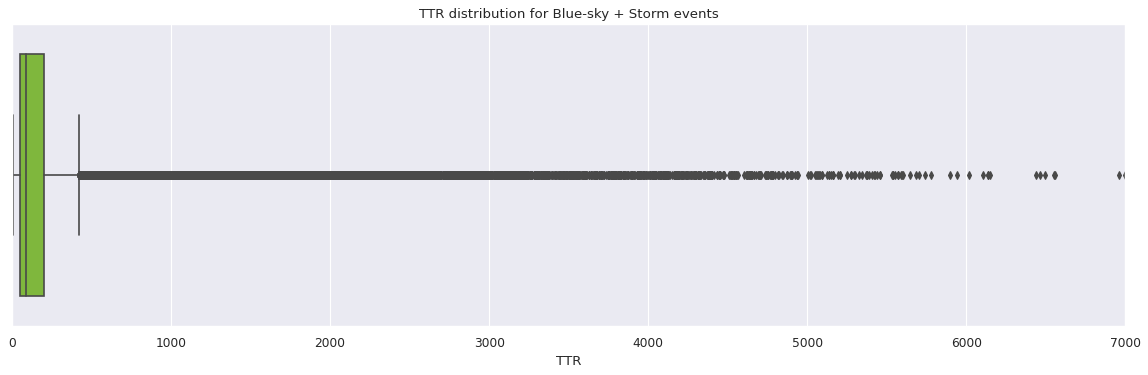

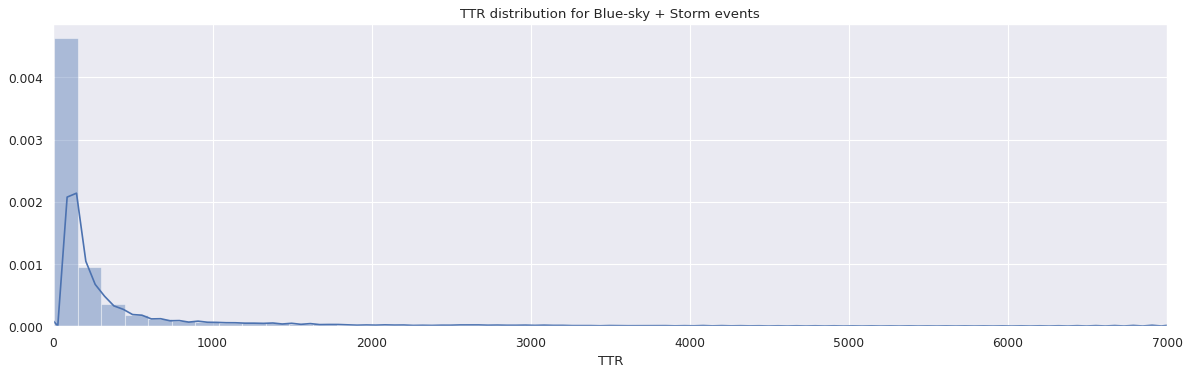

In [26]:
plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.boxplot(df_ipl_ads.TTR, palette = ['#81cb29'])
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 7000))
plt.plot()
print("Mean TTR", round(df_ipl_ads.TTR.mean(),2))

plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.distplot(df_ipl_ads.TTR)
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 7000))
plt.plot()

In [27]:
df_ipl_ads['Date'] = df_ipl_ads['CREATION_DATETIME'].dt.date
df_ipl_ads['Date'] = pd.to_datetime(df_ipl_ads['Date'])

In [28]:
df_ipl_ads['Date'].dtype

dtype('<M8[ns]')

In [29]:
df_ipl_ads = df_ipl_ads[~((df_ipl_ads['Date'].dt.year == 2008) & (df_ipl_ads['Date'].dt.month == 6))]
df_ipl_ads = df_ipl_ads[~((df_ipl_ads['Date'].dt.year == 2011) & (df_ipl_ads['Date'].dt.month == 6))]
df_ipl_ads = df_ipl_ads[~((df_ipl_ads['Date'].dt.year == 2015) & (df_ipl_ads['Date'].dt.month == 7))]
df_ipl_ads = df_ipl_ads[~((df_ipl_ads['Date'].dt.year == 2016) & (df_ipl_ads['Date'].dt.month == 6))]

In [30]:
df_ipl_ads.shape

(78344, 160)

Mean TTR 236.72


[]

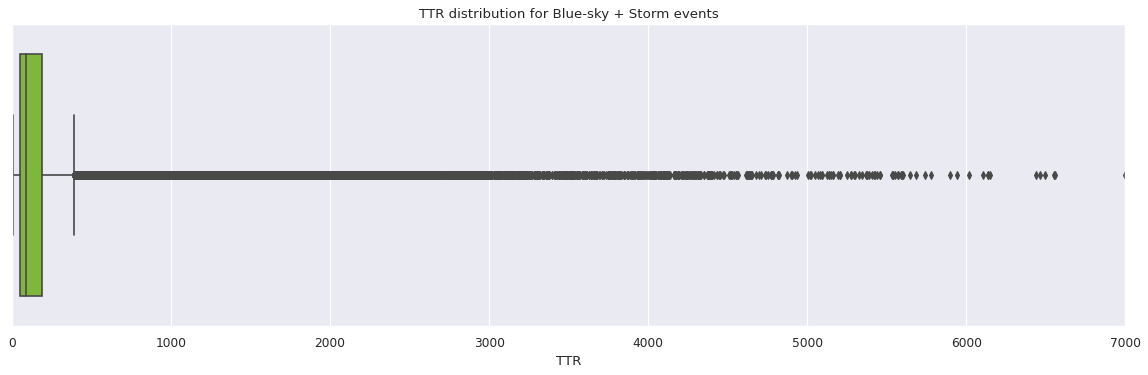

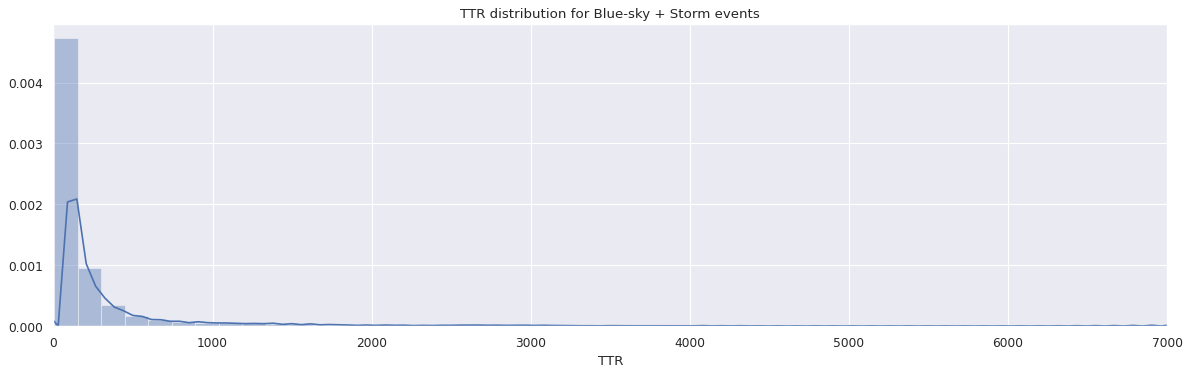

In [31]:
plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.boxplot(df_ipl_ads.TTR, palette = ['#81cb29'])
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 7000))
plt.plot()
print("Mean TTR", round(df_ipl_ads.TTR.mean(),2))

plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.distplot(df_ipl_ads.TTR)
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 7000))
plt.plot()

### IQR score
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 95th and 5th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. <br>
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. <br>
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. <br>

In [32]:
q_low = df_ipl_ads["TTR"].quantile(0.01)
q_hi  = df_ipl_ads["TTR"].quantile(0.99)

df_ipl_ads_v1 = df_ipl_ads[(df_ipl_ads["TTR"] < q_hi) & (df_ipl_ads["TTR"] > q_low)]
print(df_ipl_ads.shape)
print(df_ipl_ads_v1.shape)

(78344, 160)
(76776, 160)


Mean TTR 204.25
Median TTR 86.35


[]

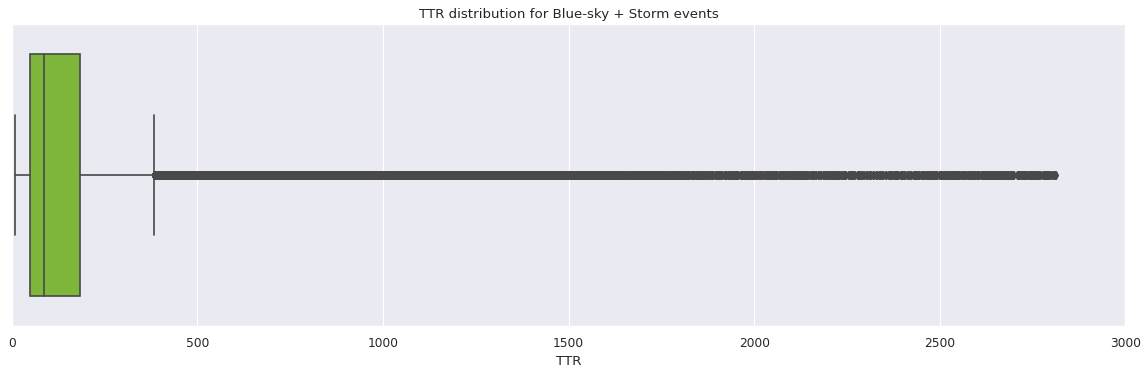

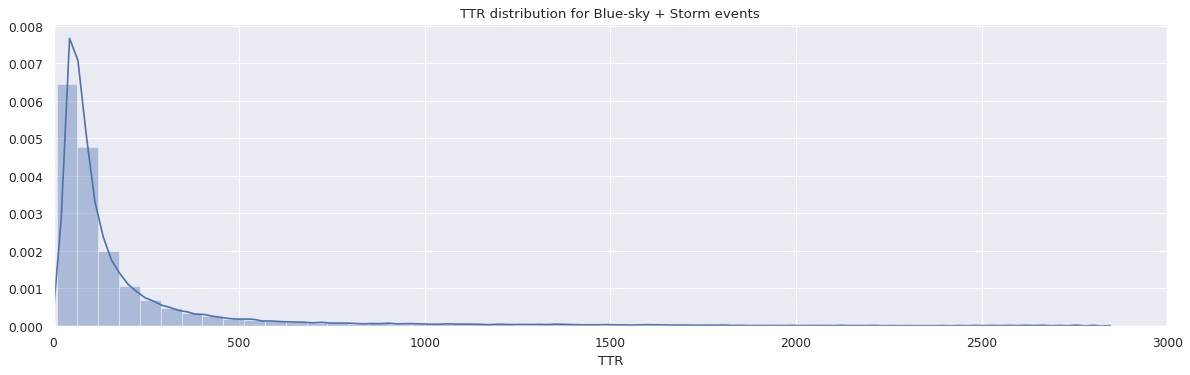

In [33]:
plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.boxplot(df_ipl_ads_v1.TTR, palette = ['#81cb29'])
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 3000))
plt.plot()
print("Mean TTR", round(df_ipl_ads_v1.TTR.mean(),2))
print("Median TTR", round(df_ipl_ads_v1.TTR.median(),2))

plt.figure(num = None,figsize=(16, 5),dpi=80,facecolor='w',edgecolor='k')
ax = sns.distplot(df_ipl_ads_v1.TTR)
ax.set_title('TTR distribution for Blue-sky + Storm events')
ax.set(xlim=(0, 3000))
plt.plot()

### **Drop columns which will not be used for modelling purpose**

In [37]:
list(df_ipl_ads_v1.columns)

['DNI_EQUIP_TYPE',
 'CALL_QTY',
 'DOWNSTREAM_CUST_QTY',
 'KEY_CUST_QTY',
 'DAY_FLAG',
 'TTR',
 'POLE_CLUE_FLG',
 'PART_LIGHT_CLUE_FLG',
 'EMERGENCY_CLUE_FLG',
 'POWER_OUT_CLUE_FLG',
 'OPEN_DEVICE_CLUE_FLG',
 'TREE_CLUE_FLG',
 'WIRE_DOWN_CLUE_FLG',
 'IVR_CLUE_FLG',
 'EQUIPMENT_CLUE_FLG',
 'TRANSFORMER_CLUE_FLG',
 'OH_CAUSE_FLG',
 'UG_CAUSE_FLG',
 'ANIMAL_CAUSE_FLG',
 'WEATHER_CAUSE_FLG',
 'WEATHER_COLD_CAUSE_FLG',
 'PUBLIC_CAUSE_FLG',
 'WEATHER_LIGHTNING_CAUSE_FLG',
 'WEATHER__SNOW_CAUSE_FLG',
 'WEATHER__WIND_CAUSE_FLG',
 'WEATHER__HEAT_CAUSE_FLG',
 'CUST_REQUEST_CAUSE_FLG',
 'WEATHER__FLOOD_CAUSE_FLG',
 'STREET_CAUSE_FLG',
 'SUBSTATION_CAUSE_FLG',
 'TREE_CAUSE_FLG',
 'MISCELLANEOUS_CAUSE_FLG',
 'NO_CAUSE_FLG',
 'PLANNED_CAUSE_FLG',
 'NO_OUTAGE_CAUSE_FLG',
 'FUSE_OCCURN_FLG',
 'CUST_EQUIP_OCCURN_FLG',
 'POLE_OCCURN_FLG',
 'TRANSFORMER_OCCURN_FLG',
 'METER_OCCURN_FLG',
 'SERVICE_OCCURN_FLG',
 'CABLE_OCCURN_FLG',
 'ST_OCCURN_FLG',
 'FIRE_OCCURN_FLG',
 'FOUND_OPEN_OCCURN_FLG',
 'PUBLIC_SAF

In [35]:
df_ipl_ads_v1.drop(['OUTAGE_ID', 'INCIDENT_ID', 'STRCTUR_NO', 'EVENT', 'CREATION_DATETIME', 'ENERGIZED_DATETIME', 'CIRCT_ID', 'SUBST_ID', 
                    'ETR_DATETIME', 'CUST_QTY', 'LAT', 'LONG', 'LIVE_OUTAGE', 'Marker_Location', 'Dis_From_Live_Centriod_div_Cust_qty',
                    'Active_no_of_trucks_per_day', 'Month', 'Year', 'Period', 'Date'], axis=1, inplace=True)

In [36]:
df_ipl_ads_v1.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_DATASET_storm_V10.4.csv')